In [407]:
using Plots
using QuadGK
using Roots
include("./ring_np_num.jl")
include("./average_detour.jl")
gr();

In [385]:
function load_run(dir)
    filenames = readdir(dir)
    filenames = [file for file in filenames if file[end] == '2']
    

    b_array = []
    player_array = []
    share_array = []
    match_array = []

    for filename in filenames
        result = load_sim(dir*filename)
        b = result[2].b
        p = result[2].player_count
        if true
            push!(b_array, b)
            push!(player_array, p)
            push!(share_array, result[1][1])
            push!(match_array, result[1][2])
        end
    end

    sorted = sortperm(b_array)

    b_array = b_array[sorted]
    player_array = player_array[sorted]
    share_array = share_array[sorted]
    match_array = match_array[sorted]
    return b_array, share_array, player_array, match_array
    end;

In [340]:
function shift_end_to_beginning(simulation)
    bools = simulation[:,end] .> 0.5
    changes = diff([bools..., bools[1]])  # -1: high to low; 1: low to high; 0 no change
    first = findfirst(x->x==1, changes)
    if first == nothing
        offset = length(simulation[:,end]) * 2
    else
        offset = first
    end    
    circshift(simulation, -offset)
end

shift_end_to_beginning (generic function with 1 method)

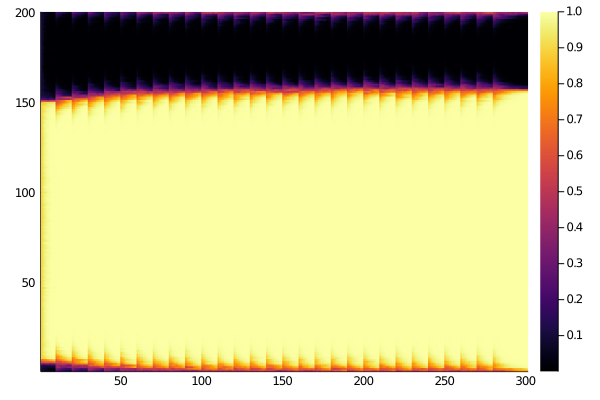

In [341]:
heatmap(shift_end_to_beginning(s8_low[5]))

## first naive test runs of multiple players

In [116]:
dir = "more_players_no_inc/"
filenames = readdir(dir);
filenames = [file for file in filenames if file[end] == '2'];

In [22]:
b_array = []
player_array = []
share_array = []
match_array = []

for filename in filenames
    result = load_sim(dir*filename)
    b = result[2].b
    p = result[2].player_count
    push!(b_array, b)
    push!(player_array, p)
    push!(share_array, result[1][1])
    push!(match_array, result[1][2])
end

sorted = sortperm(player_array)

b_array = reshape(b_array[sorted], :, 3)'
player_array = reshape(player_array[sorted], :, 3)'
share_array = reshape(share_array[sorted], :, 3)
match_array = reshape(match_array[sorted], :, 3)

#sorted2 = sortperm(player_array[1,:])

#b_array = b_array[:, sorted2]
#player_array = player_array[:, sorted2]
#share_array = share_array[sorted2, :]
#match_array = match_array[sorted2, :];

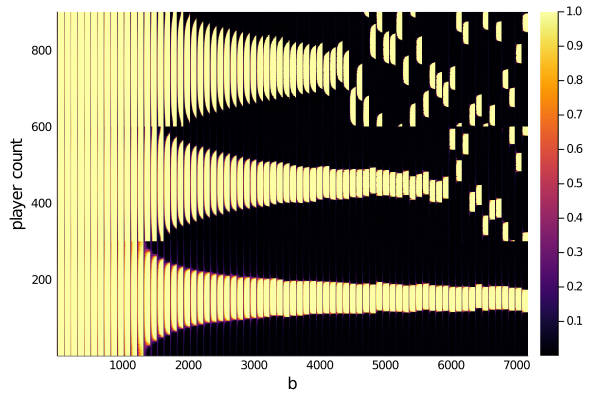

In [25]:
test_share = hvcat(71, share_array...)
heatmap(test_share, xlabel="b", ylabel="player count")

In [26]:
b_array[2, 25]

3.4

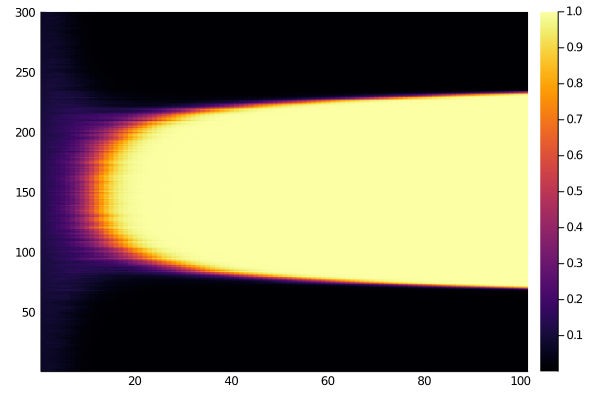

In [27]:
heatmap(share_array[25, 2])

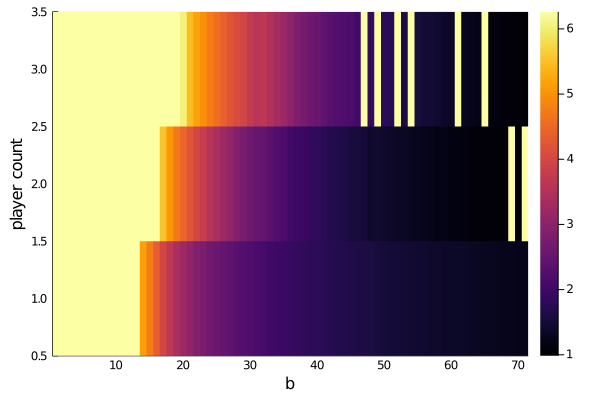

In [318]:
function simple_fitting(ϕ, p, threshold=0.5)
    places = p.>threshold
    larger_range = ϕ[places]
    if length(larger_range) == 0
        return 0, 0
    else
        return larger_range[1], larger_range[end]
    end
end;

widths = zeros(size(share_array))

ϕ_res = size(share_array[1])[1]
ϕ = LinRange(0,2π, ϕ_res+1)[1:end-1]

for (i, x) in enumerate(share_array)
    params = simple_fitting(ϕ, x[:,end])
    widths[i] = (params[2] - params[1])
end


function simple_width(ϕ, p, threshold=0.5)
    params = simple_fitting(ϕ, p, threshold)
    return params[2] - params[1]
end


heatmap(widths', xlabel="b", ylabel="player count")

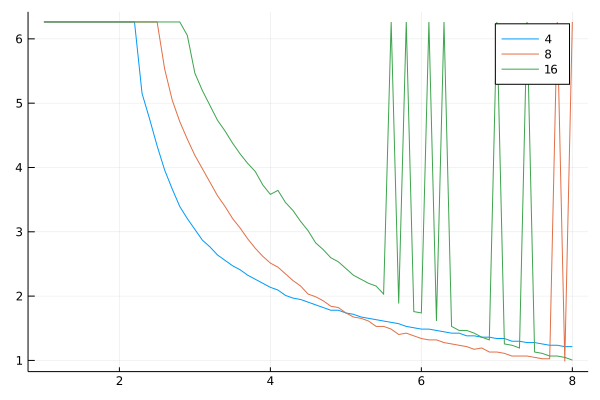

In [29]:
plot(1:0.1:8, widths, labels=[4 8 16])

---

## Starting the simulation for 16 players with a high starting probability

In [231]:
dir2 = "more_players_high_prob/"
filenames2 = readdir(dir2);
filenames2 = [file for file in filenames2 if (file[end] == '2')];

In [113]:
b_array2, share_array2, _ = load_run("more_players_high_prob/");

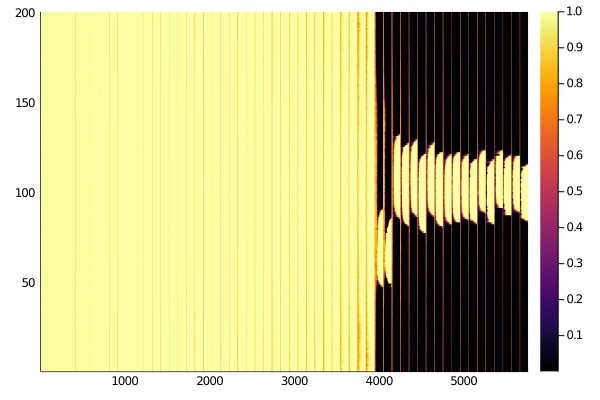

In [115]:
test_2 = hcat(share_array2...)
heatmap(test_2)

---

# High res runs of systems with 8 and 16 players

In [320]:
ϕ_res = 200
ϕ = LinRange(0,2π, ϕ_res+1)[1:end-1];

---

### 8 players low starting prob

In [342]:
b8_low, s8_low, _ = load_run("more_players_no_inc_high_res/8_low/")
s8_low = shift_end_to_beginning.(s8_low);

In [370]:
s8_low_widths = [simple_width(ϕ, p[:,end]) for p in s8_low]
s8_low_widths[1] = 2π;

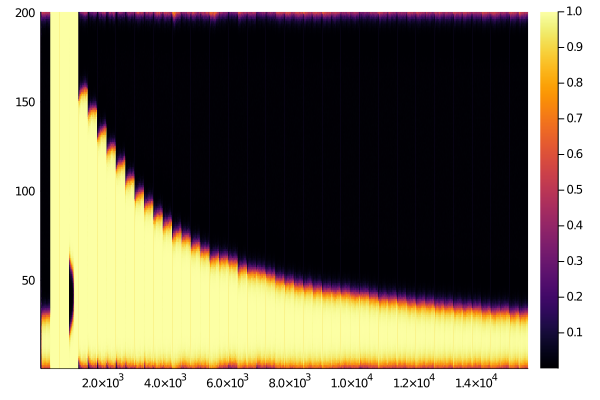

In [346]:
heatmap(hcat(s8_low...))

---

### 8 players, high starting prob (should rerun with even higher starting probability)

In [437]:
b8_high, s8_high, _ = load_run("more_players_no_inc_high_res/8_high/")
s8_high = shift_end_to_beginning.(s8_high);

In [438]:
s8_high_widths = [simple_width(ϕ, p[:,end]) for p in s8_high]
s8_high_widths[1] = 2π;

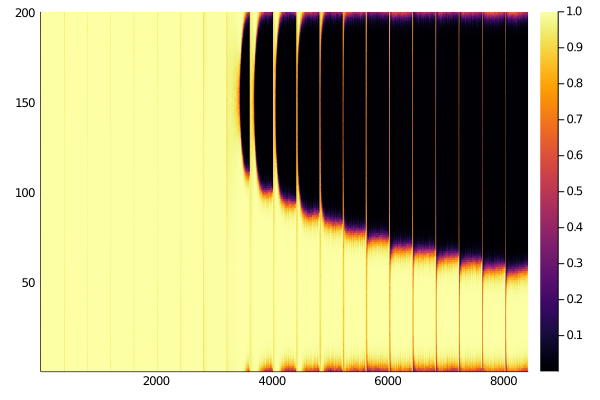

In [439]:
heatmap(hcat(s8_high...))

---

### 16 players with low starting prob

In [350]:
b16_low, s16_low, _ = load_run("more_players_no_inc_high_res/16_low/")
s16_low = shift_end_to_beginning.(s16_low);

In [367]:
s16_low_widths = [simple_width(ϕ, p[:,end]) for p in s16_low]
s16_low_widths[1] = 2π;

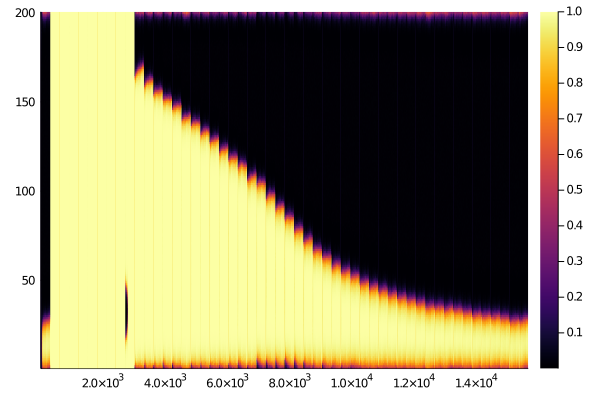

In [353]:
heatmap(hcat(s16_low...))

---

### 16 players with high starting prob

In [356]:
b16_high, s16_high, _ = load_run("more_players_no_inc_high_res/16_high/");
s16_high = shift_end_to_beginning.(s16_high);

In [368]:
s16_high_widths = [simple_width(ϕ, p[:,end]) for p in s16_high]
s16_high_widths[1] = 2π;

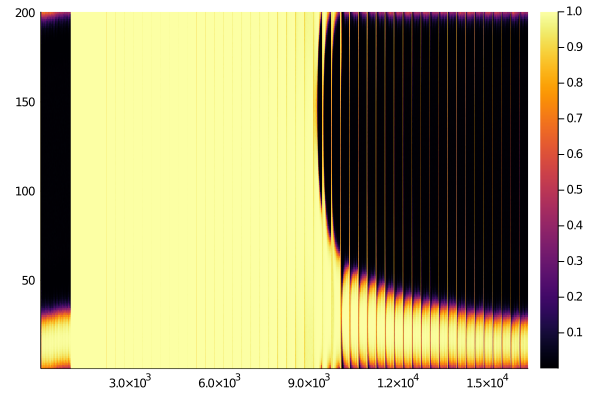

In [357]:
heatmap(hcat(s16_high...))

---

In [441]:
crit_b8 = get_crit_b(8, 0, 100000, ϕ)
crit_b16 = get_crit_b(16, 0, 100000, ϕ)
crit_b32 = get_crit_b(32, 0, 100000, ϕ)

11.941692924938796

### some plots

In [426]:
b16_old, s16_old, _ = load_run("./more_players_no_inc_clamped/tracking/")
s16_old = shift_end_to_beginning.(s16_old);

In [428]:
s16_old_widths = [simple_width(ϕ, p[:,end]) for p in s16_old];

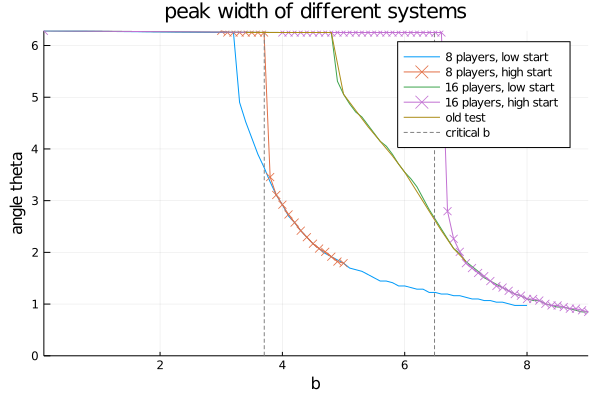

In [440]:
plot(b8_low, s8_low_widths, label="8 players, low start")
plot!(b8_high, s8_high_widths, label="8 players, high start", marker=:x)
plot!(b16_low, s16_low_widths, label="16 players, low start")
plot!(b16_high, s16_high_widths, label="16 players, high start", marker=:x)

plot!(b16_old, s16_old_widths, label="old test")

vline!([crit_b8, crit_b16, crit_b32], label="critical b", c=:grey, ls=:dash)


plot!(xlabel="b", ylabel="angle theta", title="peak width of different systems", xlims=(:auto, 9), ylims=(0, :auto))

---
### old plot from different times

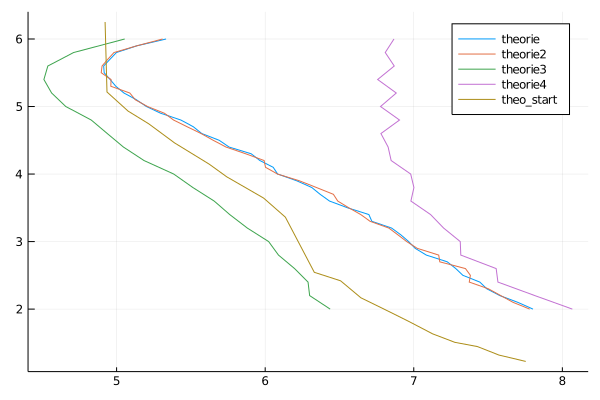

In [106]:
plot(bs, 6:-0.1:2, label="theorie")
plot!(bs2, 6:-0.1:2, label="theorie2")
plot!(bs3, 6:-0.2:2, label="theorie3")
plot!(bs4, 6:-0.2:2, label="theorie4")

plot!(b4, widths_theo ./ 200 .*2π, label="theo_start")